## Load *.trc files

Choose/insert a directory for the cell files to be searched in (e.g. F:\Marburg\single_colour_tracking\resting). All *.trc files in the directory will be loaded for the analysis.

In [1]:
from pySPT.widgets import widgetLoadHdf5
from pySPT.widgets import loadHdf5
from pySPT.analysis import cell
from pySPT.analysis import trajectory
from pySPT.analysis import coverSlip
from pySPT.analysis import trajectoryStatistics
widget_load_hdf5 = widgetLoadHdf5.WidgetLoadHdf5()
load_hdf5 = loadHdf5.LoadHdf5()
cover_slip = coverSlip.CoverSlip()
display(widget_load_hdf5.dir_box, widget_load_hdf5.dir_button)
widget_load_hdf5.dir_button.on_click(widget_load_hdf5.open_dir)
widget_load_hdf5.dir_box.observe(widget_load_hdf5.change_dir_box)

Text(value='directory to be searched in', description='directory', placeholder='Type something', style=Descrip…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [2]:
import time
from tqdm import tqdm_notebook as tqdm
def initialize(event):
    start = time.time()
    widget_load_hdf5.search_sub_folders(widget_load_hdf5.dir_name)
    load_hdf5.file_names = widget_load_hdf5.file_names
    load_hdf5.run_load_hdf5()
    #print(load_hdf5.locs[0][0])
    for cell_index in tqdm(range(0, load_hdf5.cell_numbers)):
        one_cell = cell.Cell()
        one_cell.trc_file = load_hdf5.trc_files[cell_index]
        one_cell.pixel_size = load_hdf5.pixel_sizes[cell_index]
        one_cell.pixel_amount = load_hdf5.pixel_amounts[cell_index]
        one_cell.size = load_hdf5.sizes[cell_index]
        one_cell.name = load_hdf5.names[cell_index]
        for trajectory_index in range(0, load_hdf5.trajectory_numbers[cell_index]):
            one_trajectory = trajectory.Trajectory(load_hdf5.locs[cell_index][trajectory_index])
            one_trajectory.trajectory_number = trajectory_index+1
            one_trajectory.MSDs = load_hdf5.cells_trajectories_MSDs[cell_index][trajectory_index]
            one_trajectory.times = load_hdf5.cells_trajectories_times[cell_index][trajectory_index]
            one_trajectory.MSD_fit = load_hdf5.cells_trajectories_MSD_fit[cell_index][trajectory_index]
            one_trajectory.MSD_D = load_hdf5.cells_trajectories_MSD_D[cell_index][trajectory_index]
            one_trajectory.dt = load_hdf5.dts[cell_index]
            one_trajectory.dof = load_hdf5.dofs[cell_index]
            one_trajectory.D_min = load_hdf5.D_mins[cell_index]
            one_trajectory.length_MSD = load_hdf5.cells_lengths_trajectories[cell_index][trajectory_index][0]
            one_trajectory.length_trajectory = load_hdf5.cells_lengths_MSDs[cell_index][trajectory_index][0]
            one_trajectory.D = load_hdf5.cells_trajectories_D[cell_index][trajectory_index][0]
            one_trajectory.dD = load_hdf5.cells_trajectories_dD[cell_index][trajectory_index][0]
            one_trajectory.chi_D = load_hdf5.cells_trajectories_chi2_D[cell_index][trajectory_index][0]
            one_trajectory.chi_MSD_fit = load_hdf5.cells_trajectories_chi2_rossier[cell_index][trajectory_index][0]
            one_trajectory.MSD_0 = load_hdf5.cells_trajectories_MSD0[cell_index][trajectory_index][0]
            one_trajectory.fit_area = load_hdf5.fit_areas[cell_index]
            one_trajectory.tau = load_hdf5.cells_trajectories_tau[cell_index][trajectory_index][0]
            one_trajectory.dtau = load_hdf5.cells_trajectories_dtau[cell_index][trajectory_index][0]
            one_trajectory.D_conf = load_hdf5.cells_trajectories_Dconf[cell_index][trajectory_index][0]
            one_trajectory.r = load_hdf5.cells_trajectories_r[cell_index][trajectory_index][0]
            one_trajectory.dr = load_hdf5.cells_trajectories_dr[cell_index][trajectory_index][0]
            one_trajectory.tau_threshold = load_hdf5.tau_thresholds[cell_index]
            one_trajectory.immobility = bool(load_hdf5.cells_trajectories_type[cell_index][trajectory_index][0])
            one_trajectory.confined = bool(load_hdf5.cells_trajectories_type[cell_index][trajectory_index][1])
            one_trajectory.analyse_successful = bool(load_hdf5.cells_trajectories_analyse_successful[cell_index][trajectory_index][0])
            one_cell.analysed_trajectories.append(one_trajectory)
        cover_slip.cells.append(one_cell)
        cover_slip.cell_trajectories.append(one_cell.analysed_trajectories)
        cover_slip.cell_files = load_hdf5.file_names
    print("Initialization took {} s".format(time.time()-start))
#         print(cover_slip.cell_trajectories[0][0].analyse_successful)
#         print(cover_slip.cell_trajectories[0][0].immobility)
#         print(cover_slip.cell_trajectories[0][0].confined)
#         print(type(cover_slip.cell_trajectories[0][0].analyse_successful))
#     print(cover_slip.cell_trajectories[0][0].dt)
#     print(type(cover_slip.cell_trajectories[1][0].dt))
#     print(cover_slip.cell_trajectories[0][0].MSDs)
#     print(cover_slip.cell_trajectories[1][0].MSDs)
#     print(cover_slip.cells[0].size)
#     print(cover_slip.cells[1].size)
display(widget_load_hdf5.init_button)
widget_load_hdf5.init_button.on_click(initialize)

Button(description='initialize', style=ButtonStyle(), tooltip='initialize objects')


Initialization took 2.599923610687256 s


## Filter for parameters

In [3]:
track_stats = trajectoryStatistics.TrajectoryStatistics()
def filter(event):
    widget_load_hdf5.create_clear_output()
    track_stats.cell_trajectories = cover_slip.cell_trajectories
    track_stats.run_statistics(widget_load_hdf5.min_length_box.value, widget_load_hdf5.max_length_box.value, widget_load_hdf5.min_D_box.value, widget_load_hdf5.max_D_box.value)
display(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.filter_button)
widget_load_hdf5.filter_button.on_click(filter)

max length: 537
max diffusion coefficient: 2.4615554891102156
min diffusion coefficient: 1e-05


In [4]:
## Plot diffusion histogram

In [5]:
# trajectory_stats.cell_trajectories = cover_slip.cell_trajectories
# trajectory_stats.get_index()
# trajectory_stats.create_init_filter_lst()

## Choose trajectory to plot

Choose a cell. If one wants to plot multiple times, choose a new cell and/or trajectory reload the plotting cell by clicking in the cell and pressing strg+enter.

In [6]:
def dropdown(event):
    widget_load_hdf5.cell_options = widget_load_hdf5.get_cell_names(cover_slip.cells)
widget_load_hdf5.filter_button.on_click(dropdown)
display(widget_load_hdf5.drop_down_cells)

Dropdown(description='Number:', options=(), value=None)

Choose a trajectory.

In [7]:
def dropdown(event):      
    for cell in cover_slip.cells:
        if cell.name == widget_load_hdf5.drop_down_cells.value:
            target_cell = cover_slip.cells.index(cell)
            trajectory_indexes = [i+1 for i, _ in enumerate(track_stats.cell_trajectories_filtered_index[target_cell])]
            widget_load_hdf5.trajectory_options = trajectory_indexes
            widget_load_hdf5.drop_down_trajectories.options = widget_load_hdf5.trajectory_options
#widget_load_hdf5.filter_button.on_click(dropdown)
widget_load_hdf5.drop_down_cells.observe(dropdown)
display(widget_load_hdf5.drop_down_trajectories)

Dropdown(description='Number:', options=(), value=None)

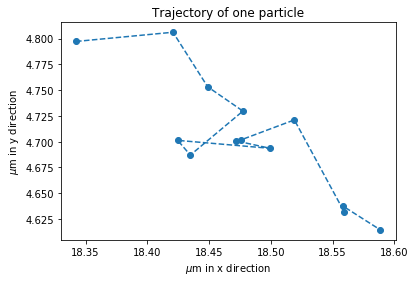

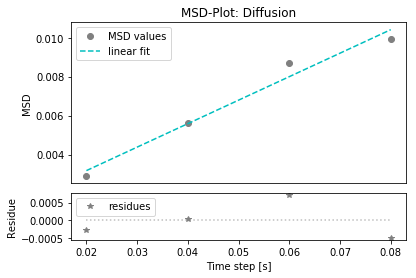

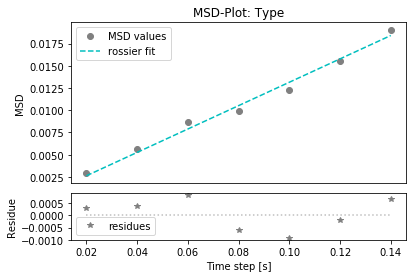

Number: 1
Diffusion coefficient: 0.030127680033577648 μm²/s
MSD0: 0.0007694425234775785 μm²
chi² linear fit: 0.00011140910086198248 μm⁴
Type immobile: False
Trajectory length: 12.0
Analyse successful? True
chi² rossier fit: 0.0002675535732396599 μm⁴
Type confined: False
Type free: True
D_conf: 0.03287488828624983 μm²/s
r_conf: 5.024525535518655 μm
tau: 255.97913963242576 s
tau threshold: 0.12 s


In [9]:
def plot_particle(event):
#     import numpy as np
#     particle = cover_slip.cell_trajectories[0][2]
#     print(particle.MSDs)
#     print(type(particle.MSDs))
#     print(np.shape(particle.MSDs))
#     print(particle.localizations)
#     print(type(particle.localizations))
#     print(np.shape(particle.localizations))
#     print(particle.trajectory_number)
#     print(particle.D)
    widget_load_hdf5.create_clear_output()
    cover_slip.plot_trajectory(widget_load_hdf5.drop_down_cells.value, widget_load_hdf5.drop_down_trajectories.value)
display(widget_load_hdf5.plot_button)
widget_load_hdf5.plot_button.on_click(plot_particle)